# Analyzing data

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>. 

---

This notebook contains an introduction to use of Python, pandas and SciPy for data analysis.

In [1]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

Let's download and import some data on weather conditions in 2013 at Toulouse airport (official code name is "LFBO"), from the `wunderground.com` web site, using the pandas library. (For convenience, we have downloaded [this data](http://www.wunderground.com/history/airport/LFBO/2013/1/1/CustomHistory.html?dayend=1&monthend=1&yearend=2014&req_city=NA&req_state=NA&req_statename=NA&format=1), cleaned it up a little, and uploaded to the risk-engineering.org website.) We then look at the first few lines of data, using the `head` method of the pandas dataframe.

In [2]:
data = pandas.read_csv("http://risk-engineering.org/static/data/TLS-weather-data-2013.csv")
data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


The `columns` field of the dataframe provides access to the names of the columns.

In [3]:
data.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

## Data consistency checks

It is good practice to run a few checks on your data, to make sure that you understand how the columns are encoded and to check things look sensible. A simple way of writing such checks in Python is to use the `assert` function to write a few assertions. If an assertion fails, Python will print an error.

We can check that the number of days for which we have data is a plausible number of days in a year. We can check that on each day, the maximum recorded temperature is larger than the mean and the minimum for that day, and likewise for the recorded wind speeds. We can also check that all wind speeds are positive.

In [4]:
assert(0 < len(data) <= 365)
for index, day in data.iterrows():
    assert(day["Max TemperatureC"] >= day["Mean TemperatureC"] >= day["Min TemperatureC"])
    assert(day["Max Wind SpeedKm/h"] >= day["Mean Wind SpeedKm/h"] >= 0)
    assert(360 >= day["WindDirDegrees"] >= 0)

What was the lowest temperature measured in 2013?

In [5]:
def FahrenheitToCelsius(F): 
    return (F - 32) * 5 / 9
FahrenheitToCelsius(-40)

-40.0

In [6]:
data[u"Min TemperatureC"].min()

-7

Let's look at how the mean daily temperature changed over the year.

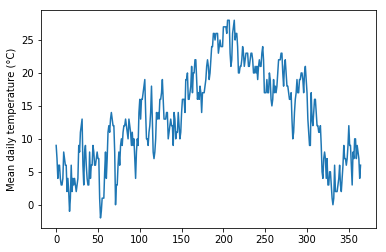

In [7]:
plt.plot(data[u"Mean TemperatureC"])
plt.ylabel(u"Mean daily temperature (°C)");

## Checking for correlation between random variables

Let's check for a correlation between various measurements, such as temperature, pressure, wind speed and visibility.

(0.0073265866097804765, 0.88905822293265291)

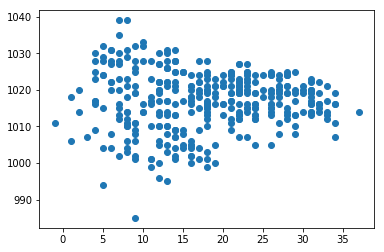

In [8]:
plt.scatter(data["Max TemperatureC"], data["Mean Sea Level PressurehPa"]);
scipy.stats.pearsonr(data["Max TemperatureC"], data["Mean Sea Level PressurehPa"])

(-0.026087479441801349, 0.61934730053877263)

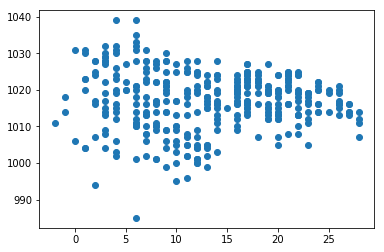

In [9]:
plt.scatter(data["Mean TemperatureC"], data["Mean Sea Level PressurehPa"]);
scipy.stats.pearsonr(data["Mean TemperatureC"], data["Mean Sea Level PressurehPa"])

(-0.17492033473927471, 0.00078993490359894377)

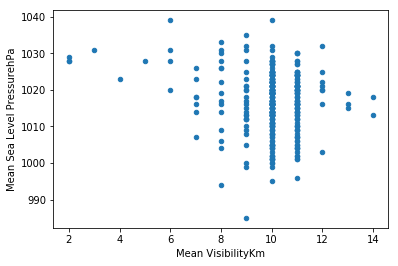

In [10]:
data.plot(x=u"Mean VisibilityKm", y=u"Mean Sea Level PressurehPa", kind='scatter');
scipy.stats.pearsonr(data["Mean VisibilityKm"], data["Mean Sea Level PressurehPa"])

(0.26244850822084609, 3.6510407873520409e-07)

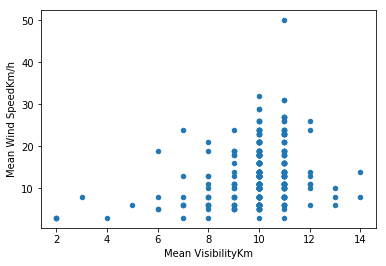

In [11]:
data.plot(x=u"Mean VisibilityKm", y=u"Mean Wind SpeedKm/h", kind='scatter');
scipy.stats.pearsonr(data["Mean VisibilityKm"], data["Mean Wind SpeedKm/h"])

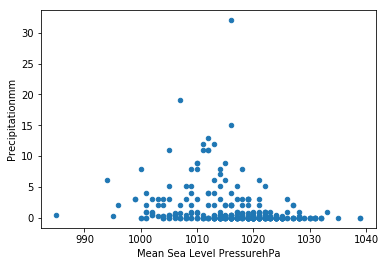

In [12]:
data.plot(x=u"Mean Sea Level PressurehPa", y=u"Precipitationmm", kind='scatter');

The [dew point](http://en.wikipedia.org/wiki/Dew_point) is the saturation temperature for water in air (the temperature at which water vapour condenses). It is associated with the temperature and with the level of humidity (exercise: check the correlation with humidity).

(0.93502614583773591, 1.5718647760532201e-165)

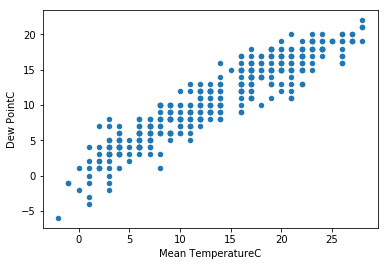

In [13]:
data.plot(x=u'Mean TemperatureC', y='Dew PointC', kind='scatter');
scipy.stats.pearsonr(data["Mean TemperatureC"], data["Dew PointC"])

If you are using a probabilistic model to generate weather samples for some risk calculation, it is important that your samples respect the correlation between inputs variables. Otherwise, you may be running your risk model on improbable combinations of input weather variables, and your results will be unrealistic.

## Fitting a probability distribution to data

SciPy has functionality which allows you to "fit" a probability distribution to your data. It will calculate the distribution parameters which give the best match to your data (the lowest level of error). Let's try that first with some generated data from a normal distribution.

In [14]:
obs = numpy.random.normal(loc=10, scale=2, size=1000)
scipy.stats.norm.fit(obs)

(10.023526358260588, 2.024857284202163)

It tells us that the best parameters for a normal distribution based on our data are a mean of 9.93 and standard deviation of 2.04. Indeed, that is very close to the original parameters. We can superimpose our "fitted" normal with a histogram of the data to check the fit visually.

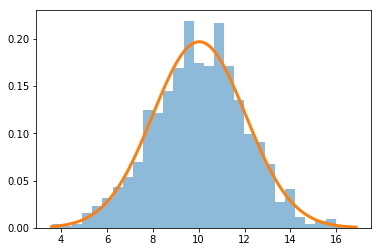

In [15]:
mu, sigma = scipy.stats.norm.fit(obs)
plt.hist(obs, bins=30, normed=True, alpha=0.5);
x = numpy.linspace(obs.min(), obs.max(), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), lw=3);

It fits quite well. 

Let's do the same operation on our wind speed data for Toulouse airport. Wind speed is not normally distributed; it generally follows a lognormal distribution or a Weibull distribution. Let's start by trying to fit a lognormal distribution (`scipy.stats.lognorm` in SciPy).

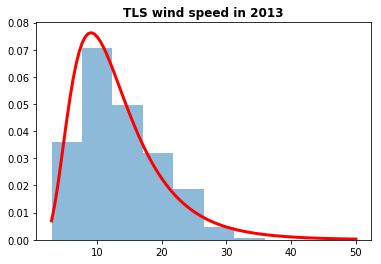

In [16]:
wind = data['Mean Wind SpeedKm/h']
shape, loc, scale = scipy.stats.lognorm.fit(wind, floc=0)
plt.hist(wind, normed=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 100)
plt.plot(support, scipy.stats.lognorm.pdf(support, shape, loc=loc, scale=scale), 'r-', lw=3)
plt.title("TLS wind speed in 2013", weight="bold");

We use a **quantile-quantile plot** to check visually how well the fitted distribution fits the data. It's particularly important to check how it fits at the edges of the qqplot (in the tails of the distribution). We check first with a normal distribution, and see that it doesn't fit very well for low wind speeds.

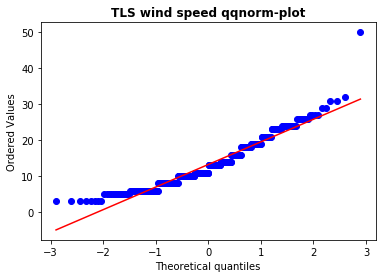

In [17]:
scipy.stats.probplot(wind, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title(u"TLS wind speed qqnorm-plot", weight="bold");

The we check with a lognormal distribution, and see that it fits better for low wind speeds, and less well for high wind speeds.

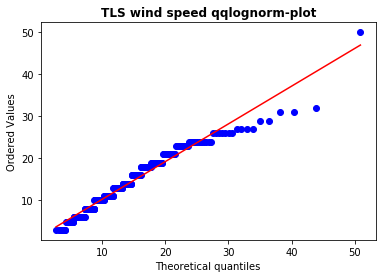

In [18]:
scipy.stats.probplot(wind, dist=scipy.stats.lognorm(shape,loc,scale), plot=plt.figure().add_subplot(111))
plt.title(u"TLS wind speed qqlognorm-plot", weight="bold");

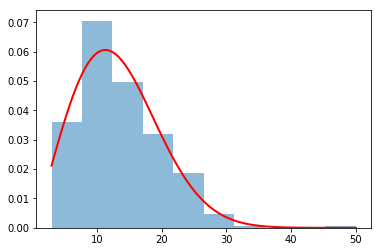

In [19]:
p0, p1, p2 = scipy.stats.weibull_min.fit(wind, floc=0)
plt.hist(wind, normed=True, alpha=0.5)
plt.plot(support, scipy.stats.weibull_min.pdf(support, p0, p1, p2), 'r-', lw=2);

Finally, we check a qqplot for a Weibull distribution, which matches the best.

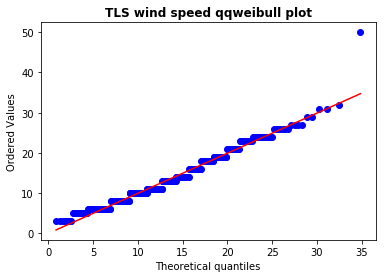

In [20]:
scipy.stats.probplot(wind, dist=scipy.stats.weibull_min(p0, p1, p2), plot=plt.figure().add_subplot(111))
plt.title(u"TLS wind speed qqweibull plot", weight="bold");